In [ ]:
#Data Analytics Major Project :- Train-Health Insurance Cross-Sell Prediction
#Team members :- Revati Deshmukh, Mittinti Keerthu, Priyansh Singh

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-image
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 65.2 MB/s eta 0:00:00


In [ ]:
# Basic
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
data_df = pd.read_csv("/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")
data_df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
225989,225990,Female,28.0,1.0,11.0,1.0,< 1 Year,No,28931.0,152.0,70.0,0.0
225990,225991,Male,24.0,1.0,28.0,1.0,< 1 Year,No,2630.0,157.0,267.0,0.0
225991,225992,Female,48.0,1.0,28.0,1.0,1-2 Year,No,66580.0,122.0,201.0,0.0
225992,225993,Male,43.0,1.0,3.0,0.0,1-2 Year,Yes,24631.0,124.0,111.0,1.0


In [ ]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225994 entries, 0 to 225993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    225994 non-null  int64  
 1   Gender                225993 non-null  object 
 2   Age                   225993 non-null  float64
 3   Driving_License       225993 non-null  float64
 4   Region_Code           225993 non-null  float64
 5   Previously_Insured    225993 non-null  float64
 6   Vehicle_Age           225993 non-null  object 
 7   Vehicle_Damage        225993 non-null  object 
 8   Annual_Premium        225993 non-null  float64
 9   Policy_Sales_Channel  225993 non-null  float64
 10  Vintage               225993 non-null  float64
 11  Response              225993 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 20.7+ MB


In [ ]:
data_df[data_df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [ ]:
data_df.isna().sum()

id                      0
Gender                  1
Age                     1
Driving_License         1
Region_Code             1
Previously_Insured      1
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
Response                1
dtype: int64

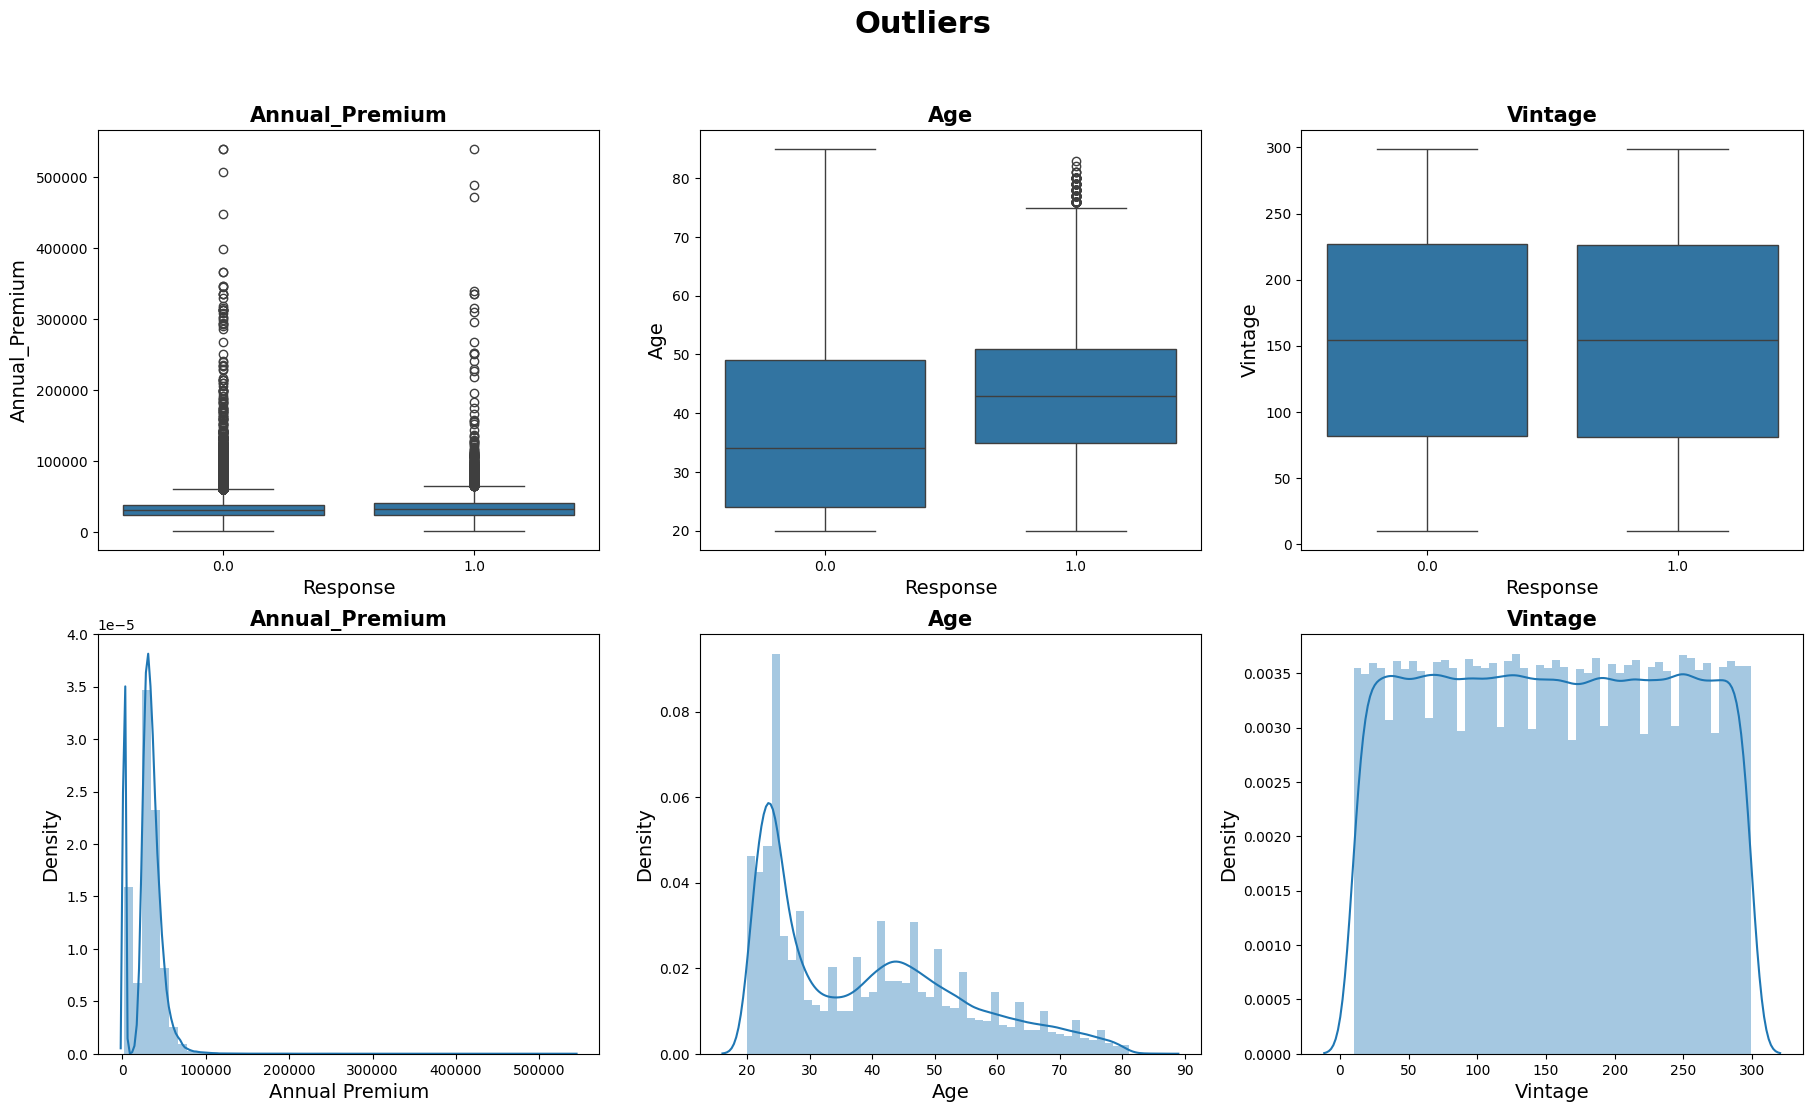

In [ ]:
def show_outliers(df):

    fig, axes = plt.subplots(2, 3, figsize=(22,12))

    sns.boxplot(ax = axes[0][0],y = 'Annual_Premium',x = 'Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][1],y = 'Age',x = 'Response', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    axes[0][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.boxplot(ax = axes[0][2],y = 'Vintage',x = 'Response', data = df)
    axes[0][2].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})


    sns.distplot(ax = axes[1][0],x = df['Annual_Premium'])
    axes[1][0].set_xlabel(xlabel = 'Annual Premium', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][1],x = df['Age'])
    axes[1][1].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][1].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1][2],x = df['Vintage'])
    axes[1][2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vintage', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Outliers', fontsize = 22, fontweight = 'bold' )

show_outliers(data_df)

In [ ]:
def outlier_treatment(df):
    Q1=df['Annual_Premium'].quantile(0.25)
    Q3=df['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df):
    scaler = MinMaxScaler()

    df['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(data_df)
scale_features(data_df)

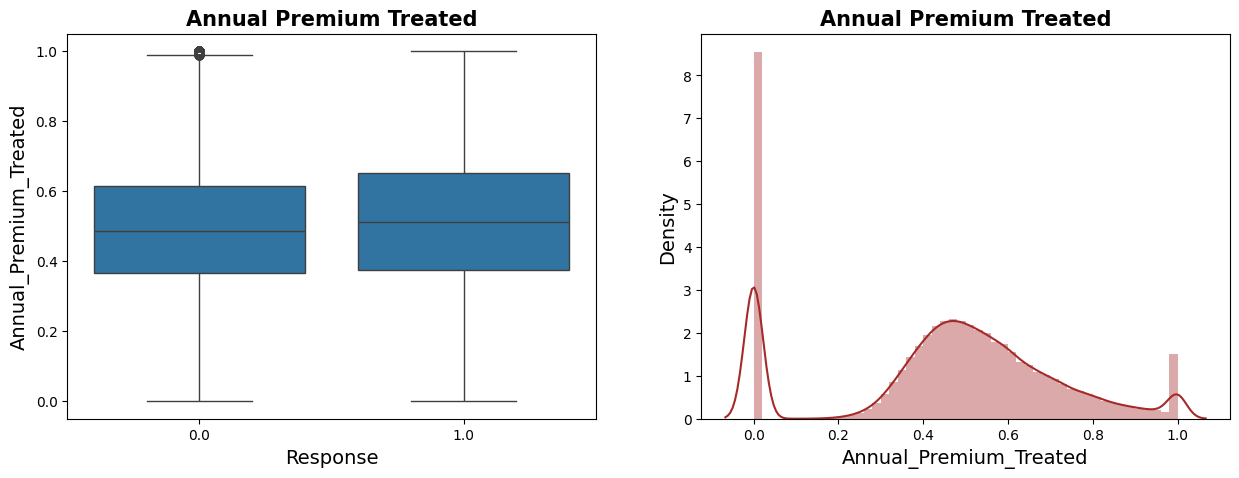

In [ ]:
def show_ann_prem_outliers(df):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(data_df)

In [ ]:
def show_distribution_numerical_features(df):
    fig, axes = plt.subplots(2,2, figsize=(20,15))

    sns.countplot(ax = axes[0][0],x = 'Age', data = df, hue='Response')
    axes[0][0].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][0].set_title('Age', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[0][1],x = 'Region_Code', data = df, hue='Response')
    axes[0][1].set_xlabel(xlabel = 'Region_Code', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0][1].set_title('Region_Code',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.countplot(ax = axes[1][0],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.histplot(ax = axes[1][1], x = data_df['Vintage'],data = df, hue='Response')
    axes[1][1].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vintage',fontdict={'fontsize': 15,  'fontweight' :'bold'})

    plt.suptitle('Distribution of Numerical Features', fontsize = 22, fontweight = 'bold' )




def show_violin_distribution(df):

    sns.catplot(y = 'Age', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Age', fontdict={'fontsize': 14})
    plt.title('Age Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Region_Code', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Region_Code', fontdict={'fontsize': 14})
    plt.title('Region Code Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})

    sns.catplot(y = 'Policy_Sales_Channel', data = df, x='Response', kind = 'violin')
    plt.xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    plt.title('Policy Sales Channel Distribution', fontdict={'fontsize': 20, 'fontweight':'bold'})




def convert_numerical_to_categorical(df):
    # Categorizing Age feature
    df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

    # Categorizing Policy_Sales_Channel feature
    x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'Channel_A' if x>100000 else 'Channel_B' if 74000100000 else 'Region_B' if x>11000 and x<340000 else 'Region_C')
    res = dict(zip(x.keys(),x.values))
    df['Region_Code_Categorical'] = df['Region_Code'].map(res)
    # df.Region_Code_Categorical.value_counts()

convert_numerical_to_categorical(data_df)


def show_distribution_num_to_cat(df):
    fig, axes = plt.subplots(1,3, figsize=(22,5))

    sns.countplot(ax = axes[0],x = 'Age_Group', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age', fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Policy_Sales_Channel_Categorical', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    plt.suptitle('Distribution of Categorical Features', fontsize = 22, fontweight = 'bold' )




def show_gender_response_relation(df):
    sns.catplot(x="Response", hue="Gender", kind="count",
                palette="pastel",
                data=df)
    plt.xlabel('Response', fontdict={'fontsize':12})
    plt.ylabel('Count',fontdict={'fontsize': 14})
    plt.title('Response V/S Gender', fontdict={'fontsize': 15, 'fontweight':'bold'})




def show_age_relations(df):
    fig, axes = plt.subplots(1,3, figsize=(25,8))
    sns.countplot(ax = axes[0],x="Response", hue="Age_Group", palette="pastel",
            data=df)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1],binwidth=0.5, x="Age_Group",
                 hue="Previously_Insured", data=df,
                 stat="count", multiple="stack")
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Age_Group V/S Previously_Insured', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.lineplot(ax = axes[2], x="Age",y="Annual_Premium_Treated",
                 data=df,hue="Gender")
    axes[2].set_xlabel(xlabel = 'Age', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[2].set_title('Age V/S Annual Premium Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})




def vehicle_damage_distribution(df):
    fig = px.pie(df, values='Response', names='Vehicle_Damage', title='Vehicle Damage Distribution')
    fig.show()


def show_vechile_damage_relations(df):
    fig, axes = plt.subplots(1,2, figsize=(22,8))
    sns.pointplot(ax = axes[0], x="Vehicle_Damage", y="Response", hue="Vehicle_Age", aspect=.7,
            kind="point", data=df)
    axes[0].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_title('Vehicle_Damage V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(x = 'Vehicle_Damage', y = 'Annual_Premium_Treated', data=df, kind = 'point')
    axes[1].set_xlabel(xlabel = 'Vehicle_Damage', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Vehicle_Damage V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})




def vehicle_age_distribution(df):
    plt.figure(figsize=(10, 8))
    sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="Dark2")
    plt.xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    plt.ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    plt.title('Vehicle_Age', fontdict={'fontsize': 15, 'fontweight':'bold'})




def show_vehicle_age_relation(df):
    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.barplot(ax = axes[0][0], x = 'Vehicle_Age', y='Response', data = df)
    axes[0][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], y = 'Response', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df)
    axes[0][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][2], y = 'Response', x = 'Vehicle_Age', hue = 'Region_Code_Categorical', data=df)
    axes[0][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[0][2].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[1][0], y = 'Response', x = 'Vehicle_Age', hue = 'Policy_Sales_Channel_Categorical', data=df )
    axes[1][0].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_title('Vehicle_Age V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.boxplot(ax = axes[1][1], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][1].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][2], y = 'Annual_Premium_Treated', x = 'Vehicle_Age', hue = 'Vehicle_Damage', data=df )
    axes[1][2].set_xlabel(xlabel = 'Vehicle_Age', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][2].set_title('Vehicle_Age V/S Annual_Premium_Treated', fontdict={'fontsize': 15, 'fontweight':'bold'})




def show_annual_premium_relation(df):
    fig, axes = plt.subplots(2,2, figsize=(15,12))

    sns.pointplot(ax = axes[0][0], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[0][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[0][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.swarmplot(ax = axes[1][0], x = 'Response', y = 'Annual_Premium_Treated', data = df[:1000])
    axes[1][0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][0].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.stripplot(ax = axes[1][1], x = 'Response', y = 'Annual_Premium_Treated', data = df)
    axes[1][1].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1][1].set_title('Annual_Premium_Treated V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})




def show_annual_premium_with_age_group(df):
    fig, axes = plt.subplots(1,2, figsize=(15,8))

    sns.barplot(ax = axes[0],y = 'Annual_Premium_Treated', x = 'Age_Group', data= data_df)
    axes[0].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.violinplot(ax = axes[1], y = 'Annual_Premium_Treated', x = 'Age_Group', data= df)
    axes[1].set_xlabel(xlabel = 'Age_Group', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_title('Annual_Premium_Treated V/S Age_Group', fontdict={'fontsize': 15, 'fontweight':'bold'})




def show_age_annual_premium_relation(df):

    plt.figure(figsize = (14,9))
    plt.hexbin(data=data_df, x='Age',y='Annual_Premium_Treated',gridsize = 30, cmap ='Greens')
    plt.title('Annual Premium V/S Age', fontdict={'fontsize': 15, 'fontweight':'bold'})
    plt.ylabel('Annual Premium Treated',fontdict={'fontsize': 14})
    plt.xlabel('Age', fontdict={'fontsize': 14})
    plt.show()


    fig = px.scatter(df, x="Age", y="Annual_Premium",
                    color="Region_Code_Categorical",
                    size_max=180,opacity=0.3, title='Age V/S Annual Premium')
    fig.show()




def age_group_distribution(df):
    fig, axes = plt.subplots(1,3, figsize=(15,6))

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.25, 0.01)
    axes[0].pie( x= df.groupby('Age_Group')['Response'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[0].set_title('with Response', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Age_Group')['Annual_Premium'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    axes[2].pie(x=df.groupby('Age_Group')['Previously_Insured'].sum(),explode=explode,
            labels=df['Age_Group'].unique(), colors=colors, autopct='%1.1f%%',
            shadow=True);
    axes[2].set_title('with Previously_Insured', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Age Group Distribution',fontsize = 20, fontweight ='bold')




def show_region_code_distribution(df):

    colors = sns.color_palette('pastel')[0:4]
    explode = (0.01, 0.01, 0.01)

    fig, axes = plt.subplots(1,2, figsize=(15,6))
    axes[0].pie(x=df.groupby('Region_Code_Categorical')['Vintage'].sum(),explode=explode,
                labels=data_df['Region_Code_Categorical'].unique(), colors=colors,autopct='%1.1f%%',
                shadow=True);
    axes[0].set_title('with Vintage', fontsize = 15, fontweight ='bold', pad=15)

    axes[1].pie(x=df.groupby('Region_Code_Categorical')['Annual_Premium_Treated'].sum(),explode=explode,
                labels=data_df['Region_Code_Categorical'].unique(), colors=colors, autopct='%1.1f%%',
                shadow=True);
    axes[1].set_title('with Annual_Premium', fontsize = 15, fontweight ='bold', pad=15)

    plt.suptitle('Region Code Distribution',fontsize = 15, fontweight ='bold')


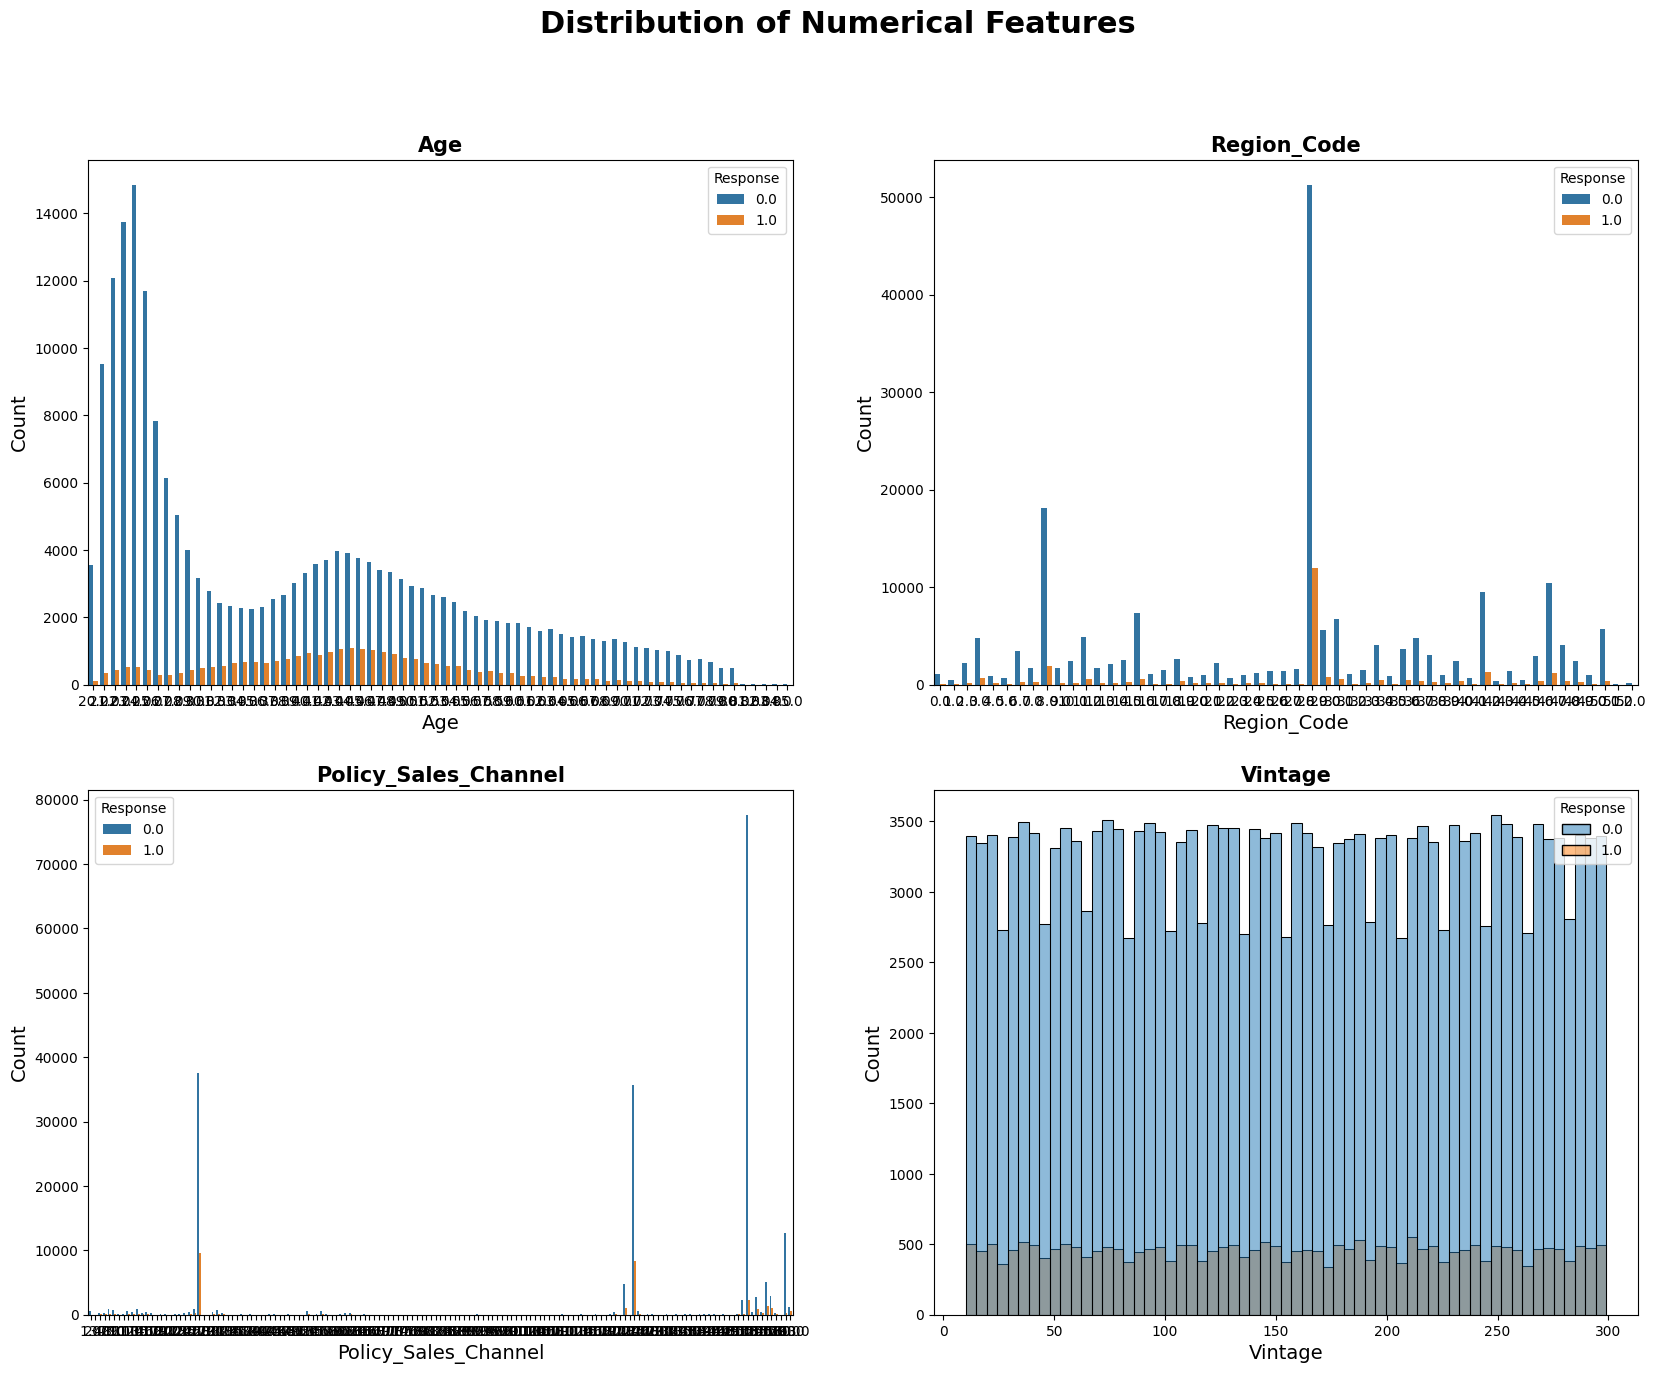

In [ ]:
def show_policy_sales_channel_relation(df):

    fig, axes = plt.subplots(2,3, figsize=(22,15))

    sns.pointplot(ax = axes[0][0], x='Policy_Sales_Channel_Categorical', y='Vintage',data=df)
    axes[0][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][0].set_ylabel(ylabel = 'Vintage', fontdict={'fontsize': 14})
    axes[0][0].set_title('Policy_Sales_Channel V/S Vintage',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.pointplot(ax = axes[0][1], x='Policy_Sales_Channel_Categorical', y='Annual_Premium_Treated',data=df)
    axes[0][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][1].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0][1].set_title('Policy_Sales_Channel V/S Annual_Premium_Treated',
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

    df['Policy_Sales_Channel_Categorical'].value_counts().plot(ax = axes[0][2] ,kind='barh')
    axes[0][2].set_xlabel(xlabel = 'Count', fontdict={'fontsize': 14})
    axes[0][2].set_ylabel(ylabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[0][2].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    sns.histplot(ax = axes[1][0],x="Policy_Sales_Channel_Categorical", hue="Response", data=df, stat="count",
                 multiple="stack",binwidth=0.5)
    axes[1][0].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1][0].set_title('Policy_Sales_Channel', fontdict={'fontsize': 15, 'fontweight':'bold'})

    groupPolicySalesBySum=df.groupby(by=["Policy_Sales_Channel_Categorical"]).sum().reset_index()
    sns.barplot(ax = axes[1][1], x="Policy_Sales_Channel_Categorical", y="Response", data=groupPolicySalesBySum)
    axes[1][1].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][1].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][1].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})


    sns.barplot(ax = axes[1][2], x='Policy_Sales_Channel_Categorical', y='Response', data=df, hue='Region_Code_Categorical')
    axes[1][2].set_xlabel(xlabel = 'Policy_Sales_Channel_Categorical', fontdict={'fontsize': 14})
    axes[1][2].set_ylabel(ylabel = 'Response', fontdict={'fontsize': 14})
    axes[1][2].set_title('Policy_Sales_Channel V/S Response', fontdict={'fontsize': 15, 'fontweight':'bold'})




def count_each_categorical_feature(df):
    categorical_columns = ['Gender', 'Age_Group', 'Region_Code_Categorical', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel_Categorical']

    fig, axes =  plt.subplots(2, 7, figsize=(45, 15))
    for i in range(7):
        sns.countplot(data = df[df['Response']==1], x=categorical_columns[i], ax=axes[0][i])
        axes[0][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[0][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
        axes[0][i].set_title(categorical_columns[i],
                         fontdict={'fontsize': 15, 'fontweight':'bold'})

        sns.countplot(data = df[df['Response']==0], x=categorical_columns[i], ax=axes[1][i])

        axes[1][i].set_xlabel(xlabel = categorical_columns[i], fontdict={'fontsize': 14})
        axes[1][i].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 12})
        axes[1][i].set_title(categorical_columns[i],
                         fontdict={'fontsize': 15, 'fontweight':'bold'})


# Exploring the Numerical Features
# We have 4 numerical features: Age, Policy_Sales_Channel, Region_Code, Vintage. Without any further delay, let's explore these features.

show_distribution_numerical_features(data_df)

In [ ]:
def show_distribution_num_to_cat(df):

    fig, axes = plt.subplots(1, 3, figsize=(22, 15))

    sns.countplot(ax = axes[0],x = 'Region_Code_Categorical', data = df, hue='Response')
    axes[0].set_xlabel(xlabel = 'Region_Code_Categorical', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[0].set_title('Region_Code',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[1],x = 'Policy_Sales_Channel', data = df, hue='Response')
    axes[1].set_xlabel(xlabel = 'Policy_Sales_Channel', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[1].set_title('Policy_Sales_Channel',fontdict={'fontsize': 15})

    sns.countplot(ax = axes[2],x = 'Vintage', data = df, hue='Response')
    axes[2].set_xlabel(xlabel = 'Vintage', fontdict={'fontsize': 14})
    axes[2].set_ylabel(ylabel = 'Count', fontdict={'fontsize': 14})
    axes[2].set_title('Vintage',fontdict={'fontsize': 15})

In [ ]:
data_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,Age_Group,Region_Code_Categorical
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0,0.638908,0.716263,YoungAge,Channel_B
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0,0.522052,0.598616,OldAge,Channel_B
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0,0.602422,0.058824,MiddleAge,Channel_B
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0,0.438996,0.667820,YoungAge,Channel_B
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0,0.420027,0.100346,YoungAge,NaN


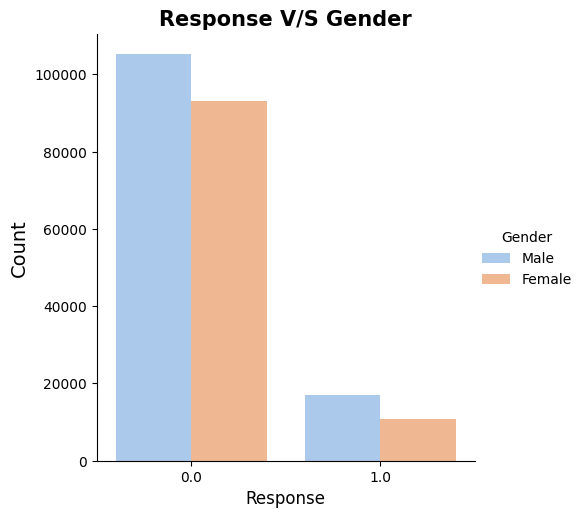

In [ ]:
show_gender_response_relation(data_df)

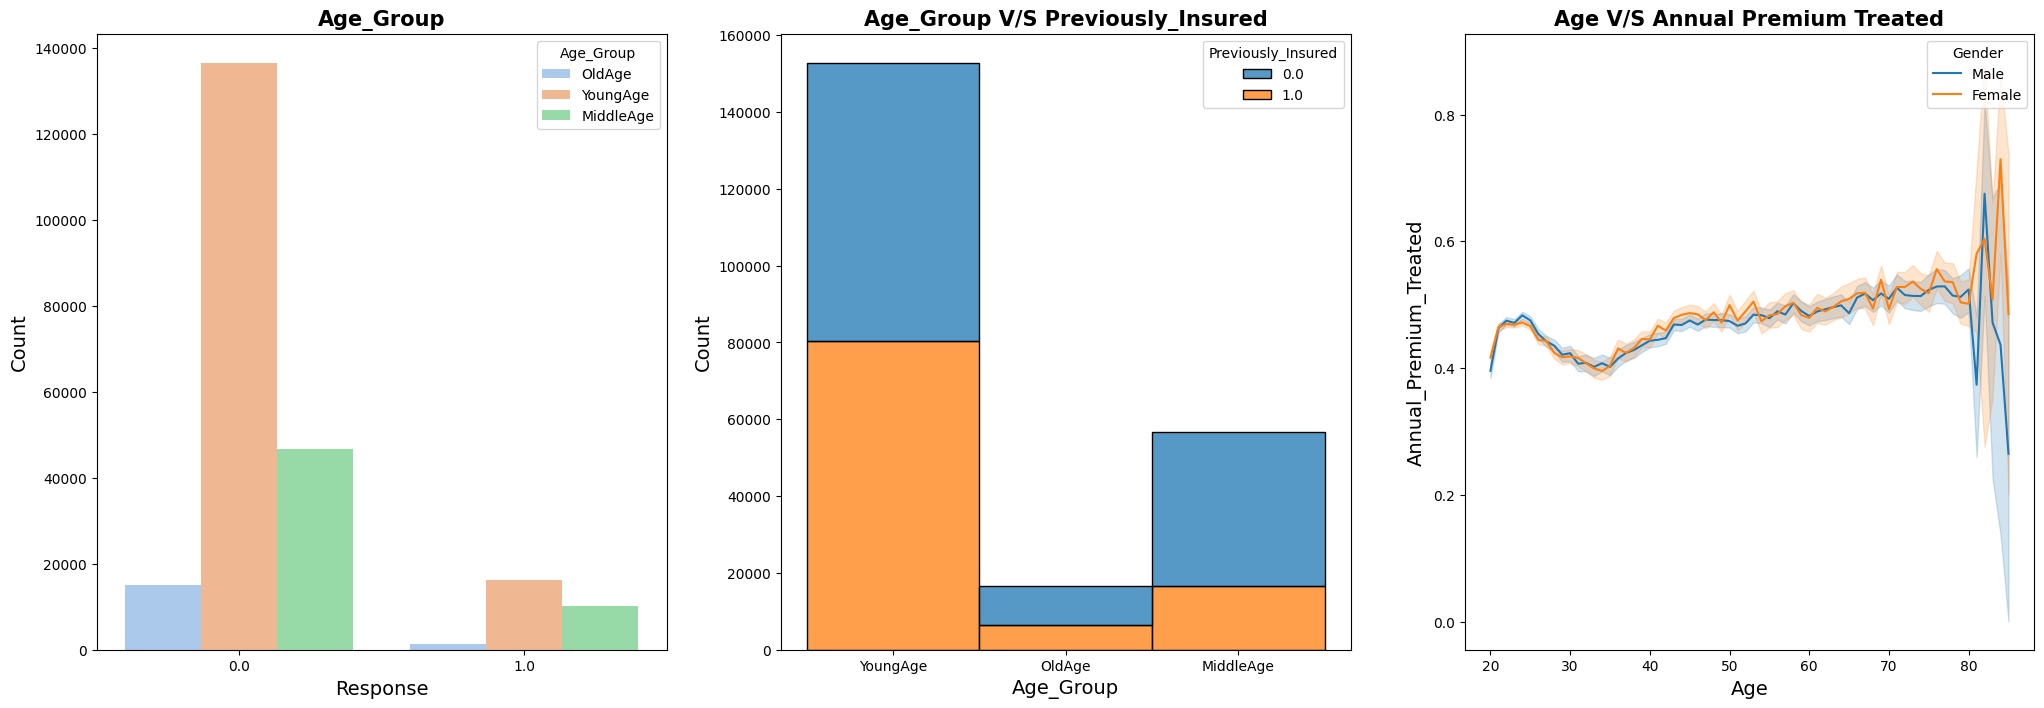

In [ ]:
show_age_relations(data_df)

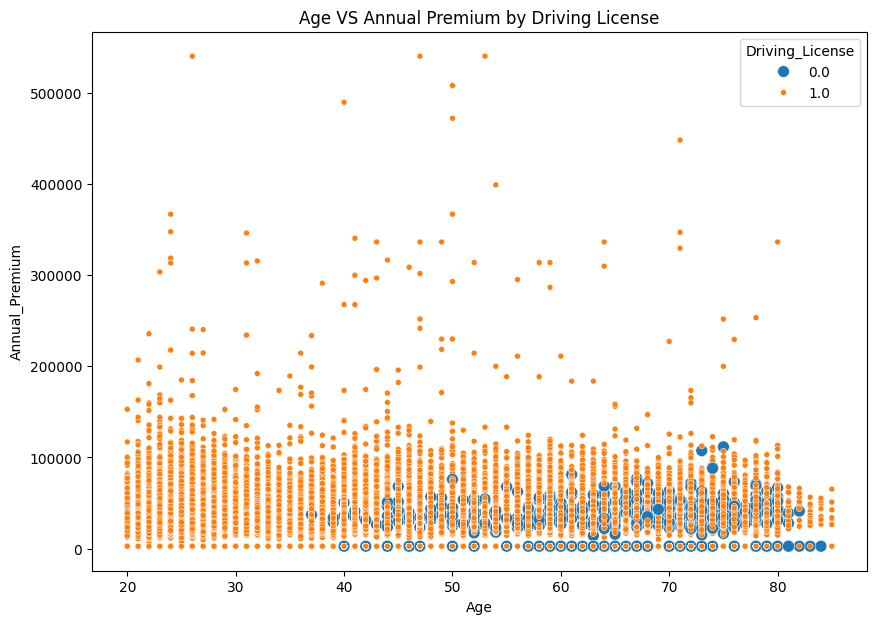

In [ ]:
plt.figure(figsize=(10,7))
ax=sns.scatterplot(x='Age',y='Annual_Premium',hue='Driving_License',size='Driving_License',data=data_df)
ax.set_title("Age VS Annual Premium by Driving License")
plt.xlabel("Age")
plt.ylabel("Annual_Premium")
plt.show(ax)

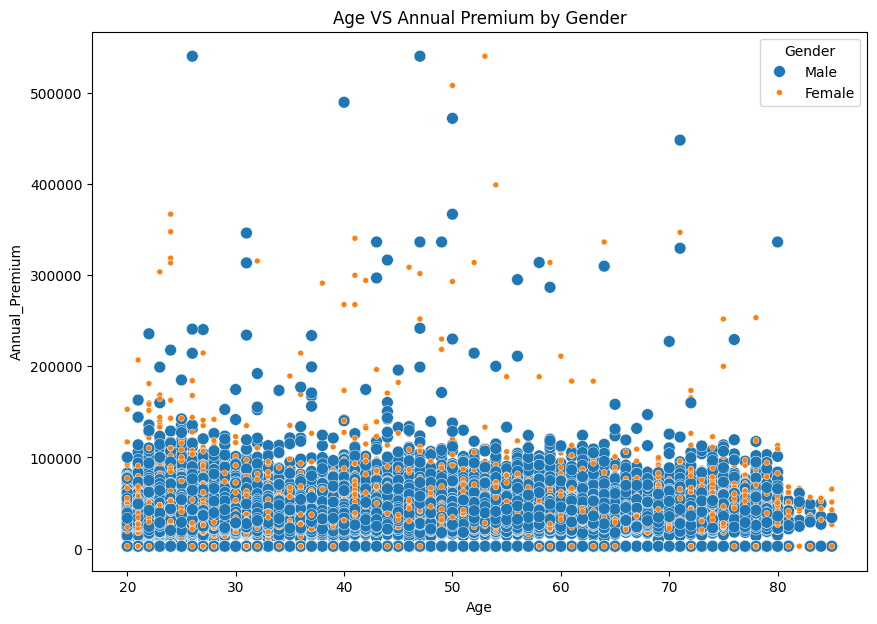

In [ ]:
plt.figure(figsize=(10,7))
ax=sns.scatterplot(x='Age',y='Annual_Premium',hue='Gender',size='Gender',data=data_df)
ax.set_title("Age VS Annual Premium by Gender")
plt.xlabel("Age")
plt.ylabel("Annual_Premium")
plt.show(ax)

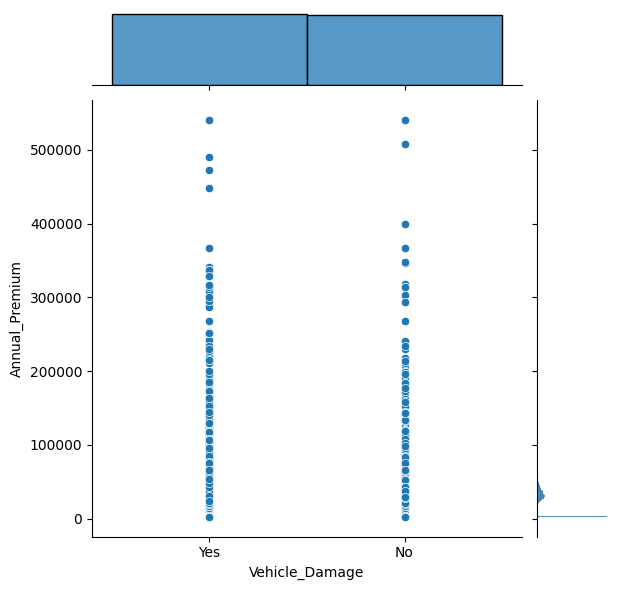

In [ ]:
#Correlation between Annual Premium and Vehicle Damage
sns.jointplot(x=data_df["Vehicle_Damage"],y=data_df["Annual_Premium"])

In [ ]:
data_df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
id,1.000000,-0.001529,-0.001164,-0.002533,0.000634,0.001237,-0.002141,0.000365,-0.000797,0.001018,0.000365
Age,-0.001529,1.000000,-0.079641,0.041224,-0.254554,0.066448,-0.576405,0.000334,0.110695,0.065822,0.000334
Driving_License,-0.001164,-0.079641,1.000000,-0.001819,0.014983,-0.011431,0.042760,-0.001136,0.009283,-0.011974,-0.001136
Region_Code,-0.002533,0.041224,-0.001819,1.000000,-0.024654,-0.009669,-0.040629,-0.002669,0.010138,-0.008673,-0.002669
Previously_Insured,0.000634,-0.254554,0.014983,-0.024654,1.000000,0.005259,0.221056,0.002012,-0.340698,0.008217,0.002012
Annual_Premium,0.001237,0.066448,-0.011431,-0.009669,0.005259,1.000000,-0.111068,0.001002,0.023749,0.948991,0.001002
Policy_Sales_Channel,-0.002141,-0.576405,0.042760,-0.040629,0.221056,-0.111068,1.000000,-0.002383,-0.141872,-0.115962,-0.002383
Vintage,0.000365,0.000334,-0.001136,-0.002669,0.002012,0.001002,-0.002383,1.000000,-0.000987,0.000452,1.000000
Response,-0.000797,0.110695,0.009283,0.010138,-0.340698,0.023749,-0.141872,-0.000987,1.000000,0.022609,-0.000987
Annual_Premium_Treated,0.001018,0.065822,-0.011974,-0.008673,0.008217,0.948991,-0.115962,0.000452,0.022609,1.000000,0.000452


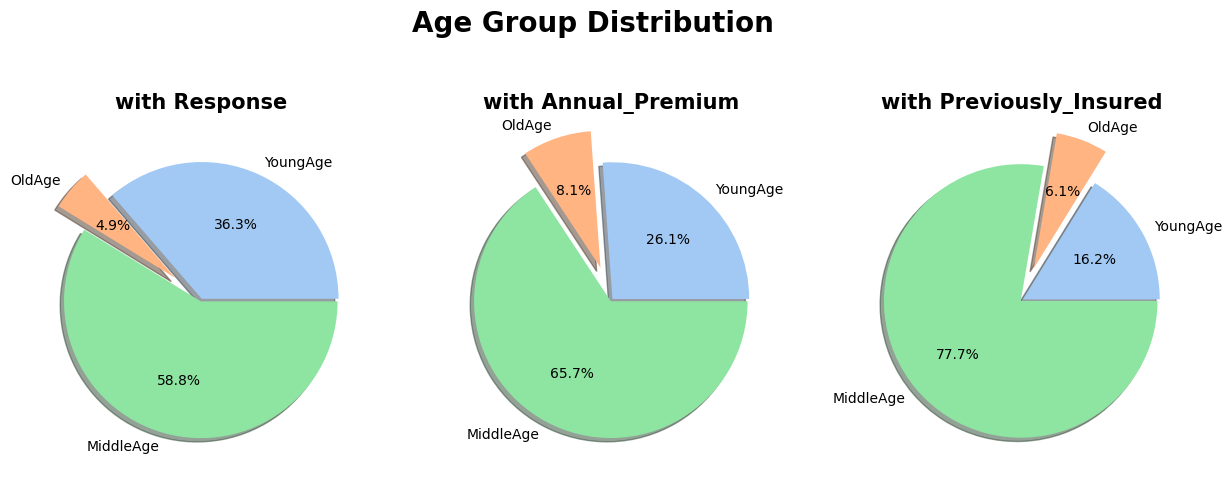

In [ ]:
age_group_distribution(data_df)

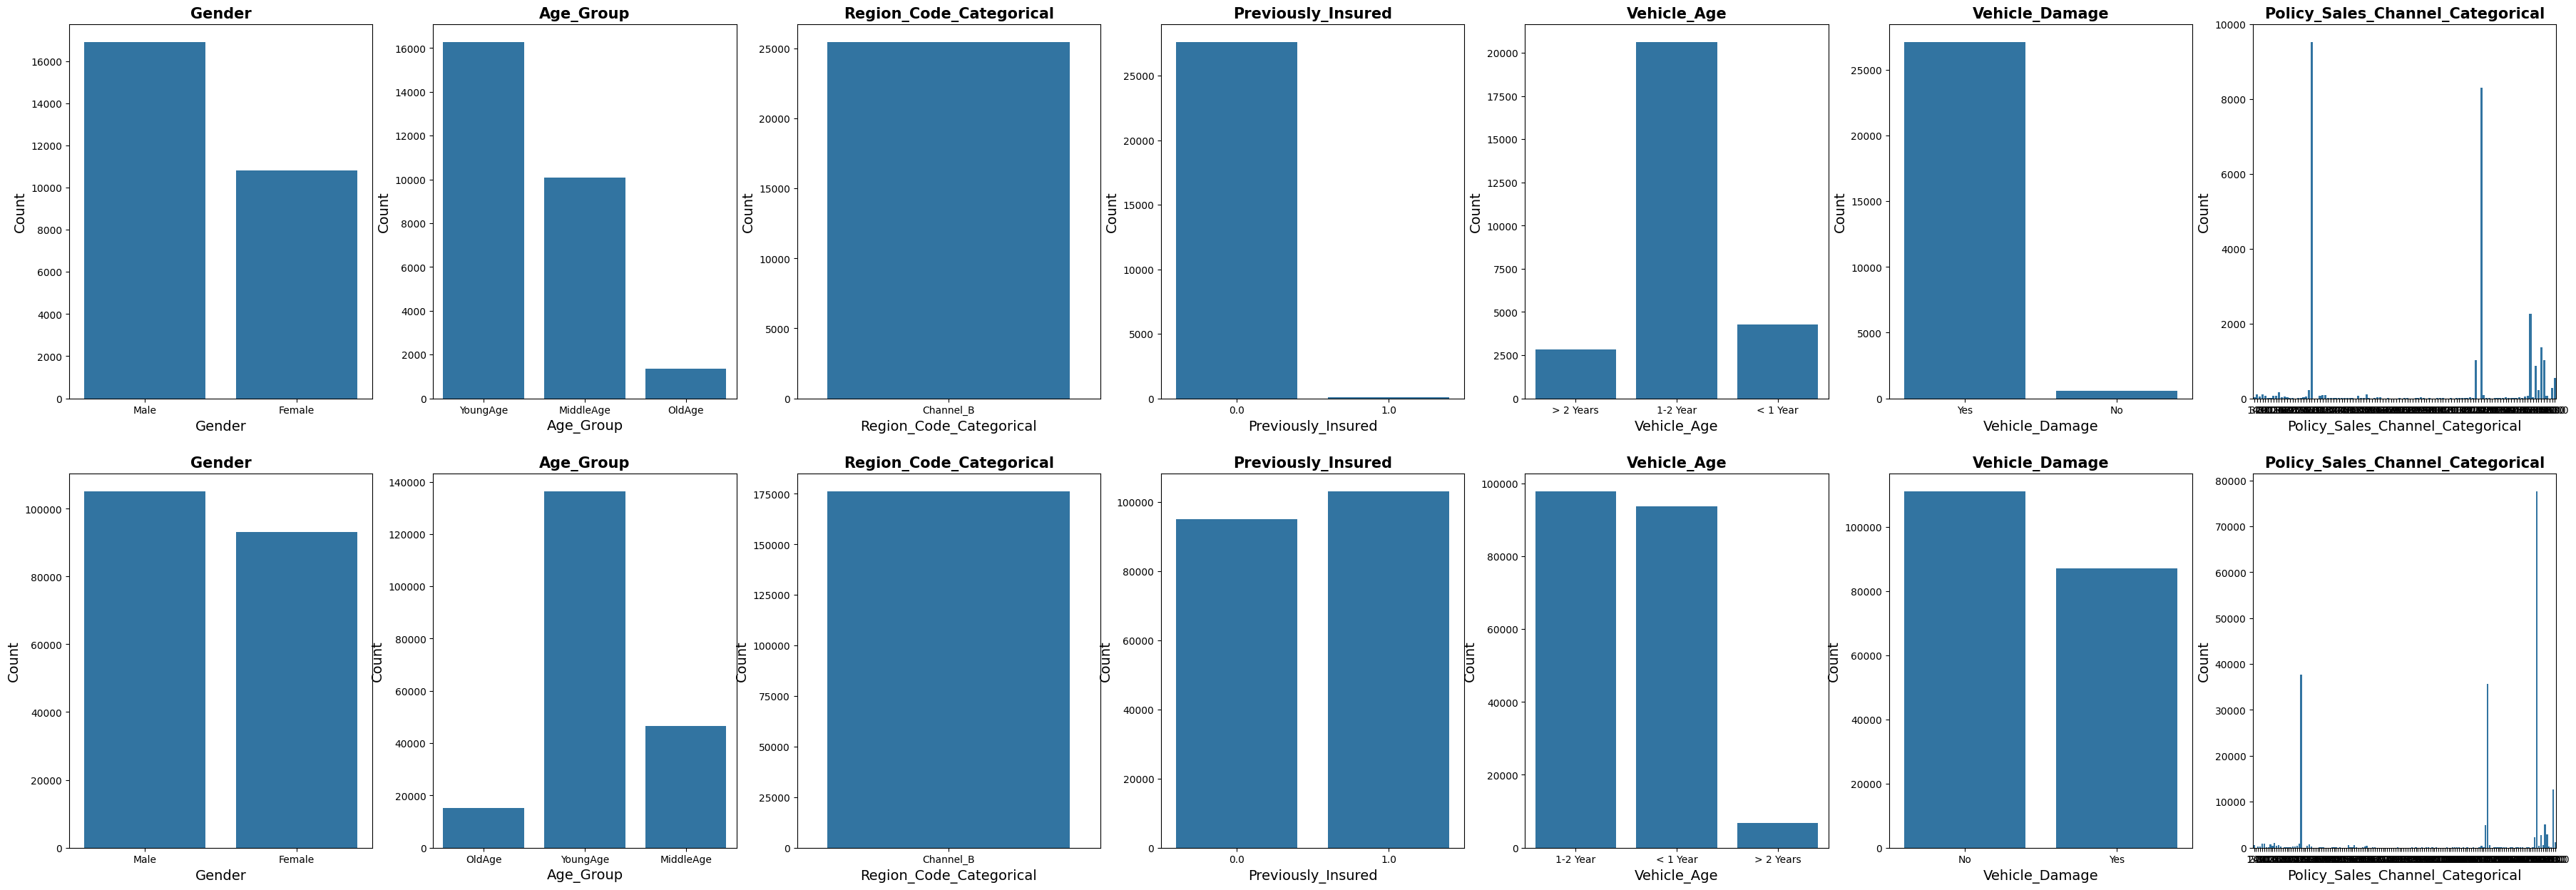

In [ ]:
count_each_categorical_feature(data_df.rename(columns={"Policy_Sales_Channel": "Policy_Sales_Channel_Categorical"}))

In [ ]:
data_df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Annual_Premium_Treated',
       'Vintage_Treated', 'Age_Group', 'Region_Code_Categorical'],
      dtype='object')

In [ ]:
import pandas as pd
data_df.info()
cols_to_drop = ['Vehicle_Age', 'Vehicle_Damage']
for col in cols_to_drop:
    if col not in data_df.columns:
        print(f"Column '{col}' not found in DataFrame")
data_df.drop(columns = cols_to_drop, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225994 entries, 0 to 225993
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       225994 non-null  int64  
 1   Gender                   225993 non-null  object 
 2   Age                      225993 non-null  float64
 3   Driving_License          225993 non-null  float64
 4   Region_Code              225993 non-null  float64
 5   Previously_Insured       225993 non-null  float64
 6   Vehicle_Age              225993 non-null  object 
 7   Vehicle_Damage           225993 non-null  object 
 8   Annual_Premium           225993 non-null  float64
 9   Policy_Sales_Channel     225993 non-null  float64
 10  Vintage                  225993 non-null  float64
 11  Response                 225993 non-null  float64
 12  Annual_Premium_Treated   225993 non-null  float64
 13  Vintage_Treated          225993 non-null  float64
 14  Age_

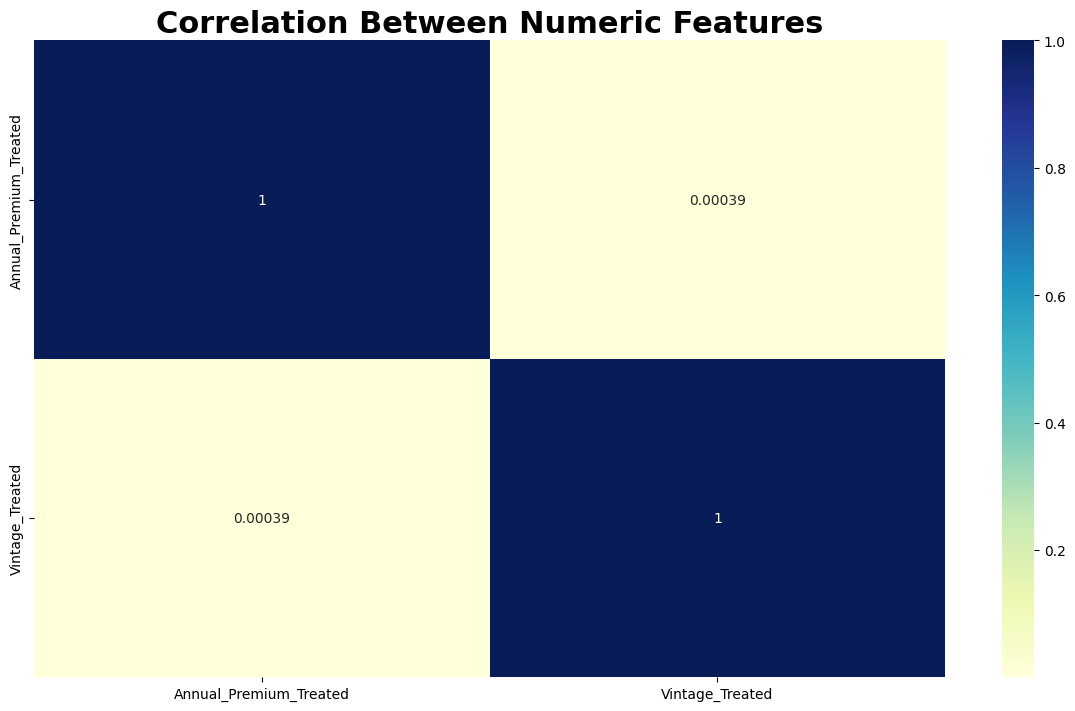

In [ ]:
def numeric_feature_selection(df):
    plt.rcParams['figure.figsize'] = 14.7,8.27
    numeric_features = ['Annual_Premium_Treated','Vintage_Treated']

    sns.heatmap(df[numeric_features].corr(method = 'kendall'),
                cmap="YlGnBu",annot=True)
    plt.title('Correlation Between Numeric Features', fontdict={'fontsize':22,'fontweight':'bold'})

numeric_feature_selection(data_df)

In [ ]:
categorical_features = ['Gender','Age_Group','Region_Code_Categorical','Previously_Insured',
                        'Vehicle_Age','Vehicle_Damage','Policy_Sales_Channel_Categorical']

In [ ]:
data_df.columns


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Annual_Premium_Treated', 'Vintage_Treated',
       'Age_Group', 'Region_Code_Categorical'],
      dtype='object')

In [ ]:
# Check the column names in your dataframe
print(data_df.columns)

# If the column names are different, update the cols_to_encode list
cols_to_encode = ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
                  'Age_Group','Policy_Sales_Channel_Categorical', 'Region_Code_Categorical']

# If the columns are missing, remove them from the cols_to_encode list
cols_to_encode = [col for col in cols_to_encode if col in data_df.columns]

# Now you can use get_dummies without any issues
data_df = pd.get_dummies(data = data_df, columns=cols_to_encode)
data_df.head()

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Annual_Premium_Treated', 'Vintage_Treated',
       'Age_Group', 'Region_Code_Categorical'],
      dtype='object')


,id,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated,Gender_Female,Gender_Male,Previously_Insured_0.0,Previously_Insured_1.0,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge,Region_Code_Categorical_Channel_B
0,1,44.0,1.0,28.0,40454.0,26.0,217.0,1.0,0.638908,0.716263,0,1,1,0,0,0,1,1
1,2,76.0,1.0,3.0,33536.0,26.0,183.0,0.0,0.522052,0.598616,0,1,1,0,0,1,0,1
2,3,47.0,1.0,28.0,38294.0,26.0,27.0,1.0,0.602422,0.058824,0,1,1,0,1,0,0,1
3,4,21.0,1.0,11.0,28619.0,152.0,203.0,0.0,0.438996,0.667820,0,1,0,1,0,0,1,1
4,5,29.0,1.0,41.0,27496.0,152.0,39.0,0.0,0.420027,0.100346,1,0,0,1,0,0,1,0


In [ ]:
def plot_confusion_matrix_and_roc_curves(model, X_test, y_test, y_pred):

    fig, axes = plt.subplots(1,2, figsize=(22,5))

    cm = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cm.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cm, ax = axes[0], annot=labels, fmt='',cmap='Blues')
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 16, 'fontweight':'bold'})

    # predict probabilities
    pred_proba = model.predict_proba(X_test)

    # roc curve for models
    fpr, tpr, thresh = roc_curve(y_test, pred_proba[:,1], pos_label=1)

    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

    plt.subplot(1, 2, 2)
    # plot roc curves
    plt.plot(fpr, tpr,linestyle='--',color='red', label = type(model).__name__)

    plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
    # title
    plt.title('ROC curve', fontdict={'fontsize': 16, 'fontweight':'bold'})
    # x label
    plt.xlabel('False Positive Rate', fontdict={'fontsize': 12})
    # y label
    plt.ylabel('True Positive rate', fontdict={'fontsize': 12})

    plt.legend(loc='best')
    plt.show()


def visualization(results_df, parameters):

    def shorten_param(param_name):
        if "__" in param_name:
            return param_name.rsplit("__", 1)[1]
        return param_name

    column_results = [f"param_{name}" for name in parameters.keys()]
    column_results += ["mean_test_score", "std_test_score", "rank_test_score"]

    results_df = results_df[column_results].sort_values("mean_test_score", ascending=False)
    results_df = results_df.rename(shorten_param, axis=1)

    for col in results_df.columns:
        if col == 'param_random_state':
            continue
        try:
            results_df[col] = results_df[col].astype(np.float64)
        except:
            continue

    fig = px.parallel_coordinates(
    results_df,
    color="mean_test_score",
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Hyper Parameter Tuning',)
    fig.show()


def evaluation_metrics(name, independent_feature_length , y_pred, y_test):

    metrics_dict = {}
    metrics_dict['Accuracy_Score'] = [accuracy_score(y_test,y_pred)]  #Accuracy Score
    metrics_dict['Precision'] = [precision_score(y_test,y_pred)] #Precision
    metrics_dict['Recall'] = [recall_score(y_test,y_pred)] #Recall
    metrics_dict['F1_Score'] = [f1_score(y_test,y_pred)] #F1 Score
    metrics_dict['ROC_AUC_Score'] = [roc_auc_score(y_test, y_pred)] #ROC AUC Score
    metrics_dict['Log_Loss'] = [log_loss(y_test, y_pred)] #Log Loss

    metrics_df = pd.DataFrame(metrics_dict)

    print(metrics_df)


def hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model):

    if tuning_model == 'Halving_Randomized_Search_CV':
        tuned_model = HalvingRandomSearchCV(model, param_distributions = parameters, scoring = "accuracy", n_jobs=-1, factor=3, cv = 5 )

    elif tuning_model == 'Randomized_Search_CV':
        tuned_model = RandomizedSearchCV(model, param_distributions = parameters, scoring = 'accuracy', cv = 3, n_iter = 50, n_jobs=-1)

    else:
        tuned_mode = GridSearchCV(model, param_grid = parameters, scoring = 'accuracy', n_jobs=-1, cv = 3)


    start_time = time.time()

    tuned_model.fit(x_train, y_train)

    stop_time = time.time()

    print('*****'*10+f'\nBest Score for {type(model).__name__} : {tuned_model.best_score_}','\n---')
    print(f'Best Parameters for {type(model).__name__} : {tuned_model.best_params_}\n'+'-----'*10)

    print('Elapsed Time:',time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print('======'*5)

    return tuned_model


def perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model):
    print('-----'*10+f'\n{type(model).__name__}\n'+'-----'*10)

    model.fit(x_train, y_train)
    untuned_pred = model.predict(x_test)

    # Evaluation Metrics before tuning
    print(f'\nEvaluation of {type(model).__name__} before tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__, len(list(x_train.columns)), untuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(model, x_test, y_test, untuned_pred)

    # Hyper-parameter tuning
    tuned_model = hyperparameter_tuning(x_train, y_train, model, parameters, tuning_model)
    tuned_pred = tuned_model.predict(x_test)

    # Evaluation Metrics after tuning
    print(f'\nEvaluation of {type(model).__name__} after tuning:\n'+'-----'*10)
    evaluation_metrics(type(model).__name__,len(list(x_train.columns)), tuned_pred, y_test)

    print()
    plot_confusion_matrix_and_roc_curves(tuned_model.best_estimator_, x_test, y_test, tuned_pred)
    visualization(pd.DataFrame(tuned_model.cv_results_), parameters)


def ml_algorithm_implementation(df, model, parameters, tuning_model, feature_importance = False):

    if feature_importance == False:
        print('########'*8+'\n     <<<< '+f'Tuning Model: {tuning_model}'+' >>>>\n'+'********'*8)

    x = data_df.iloc[:,1:]
    y = data_df['Response']

    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=57)

    if feature_importance == True:
        model.fit(x_train, y_train)
        return x_train, y_train, model

    perform_ml_algorithm(x_train, x_test, y_train, y_test, model, parameters, tuning_model)


In [ ]:
Tuning_Method = "Halving_Randomized_Search_CV"

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
DecisionTreeClassifier
--------------------------------------------------

Evaluation of DecisionTreeClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score      Log_Loss
0             1.0        1.0     1.0       1.0            1.0  2.220446e-16



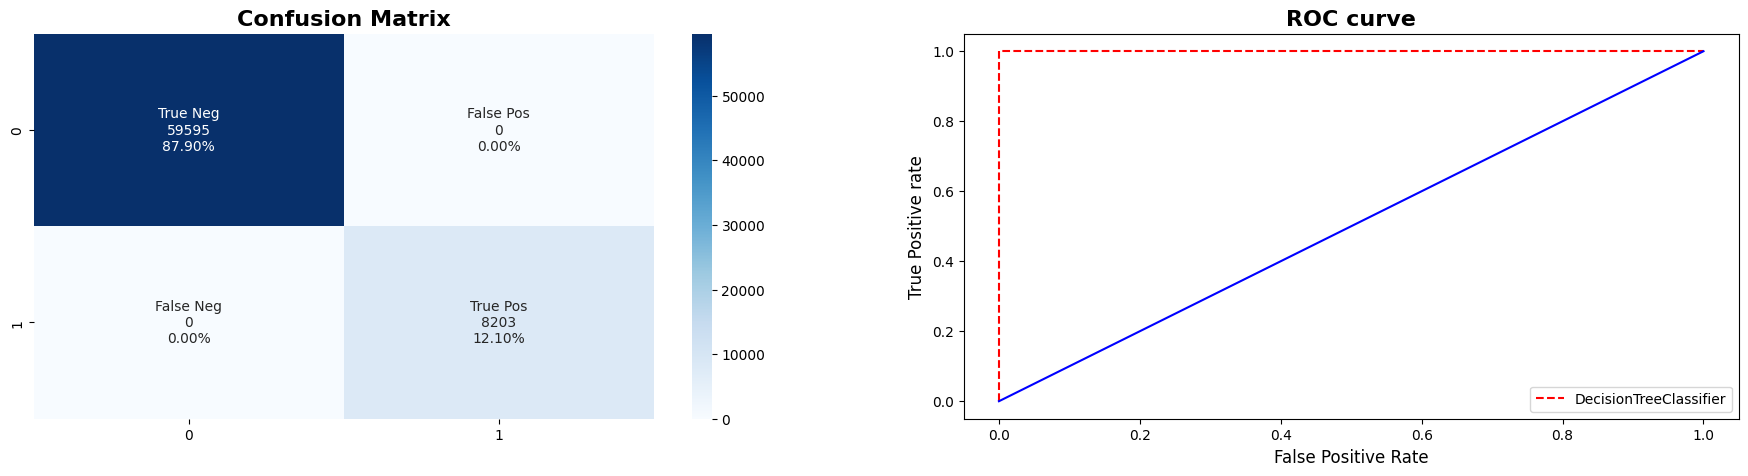

**************************************************
Best Score for DecisionTreeClassifier : 1.0 
---
Best Parameters for DecisionTreeClassifier : {'splitter': 'best', 'random_state': 23, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 4, 'max_leaf_nodes': 30, 'max_features': None, 'max_depth': None}
--------------------------------------------------
Elapsed Time: 00:02:39

Evaluation of DecisionTreeClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score      Log_Loss
0             1.0        1.0     1.0       1.0            1.0  2.220446e-16



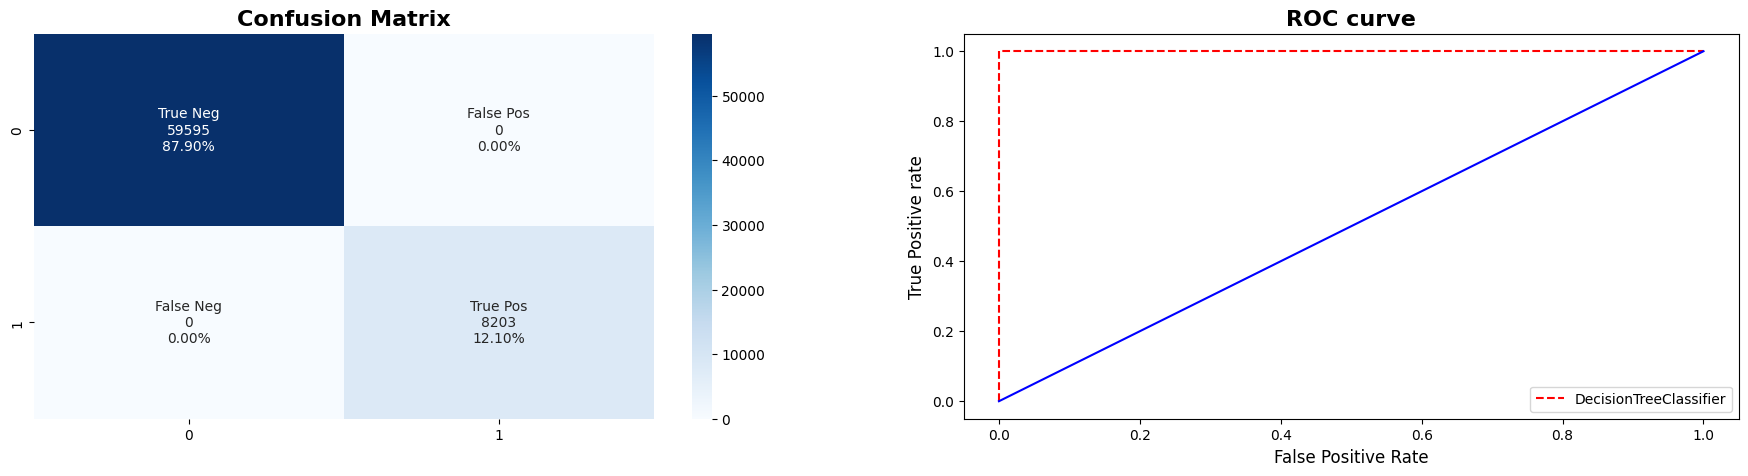

In [ ]:
!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Check for missing values in the target variable
data_df['Annual_Premium'].isnull().sum()
# Drop rows with missing values in the target variable
data_df.dropna(subset=['Annual_Premium'], inplace=True)

parameters_decision_tree = {"splitter":["best","random"],
            "max_depth" : [None,5,7,9],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0.0, 0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,30,40,50,60],
           'random_state':[23]}

ml_algorithm_implementation(data_df, DecisionTreeClassifier(), parameters_decision_tree, Tuning_Method, False)


################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
GaussianNB
--------------------------------------------------

Evaluation of GaussianNB before tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.983805    0.99609  0.86956  0.928534       0.934545  0.583733



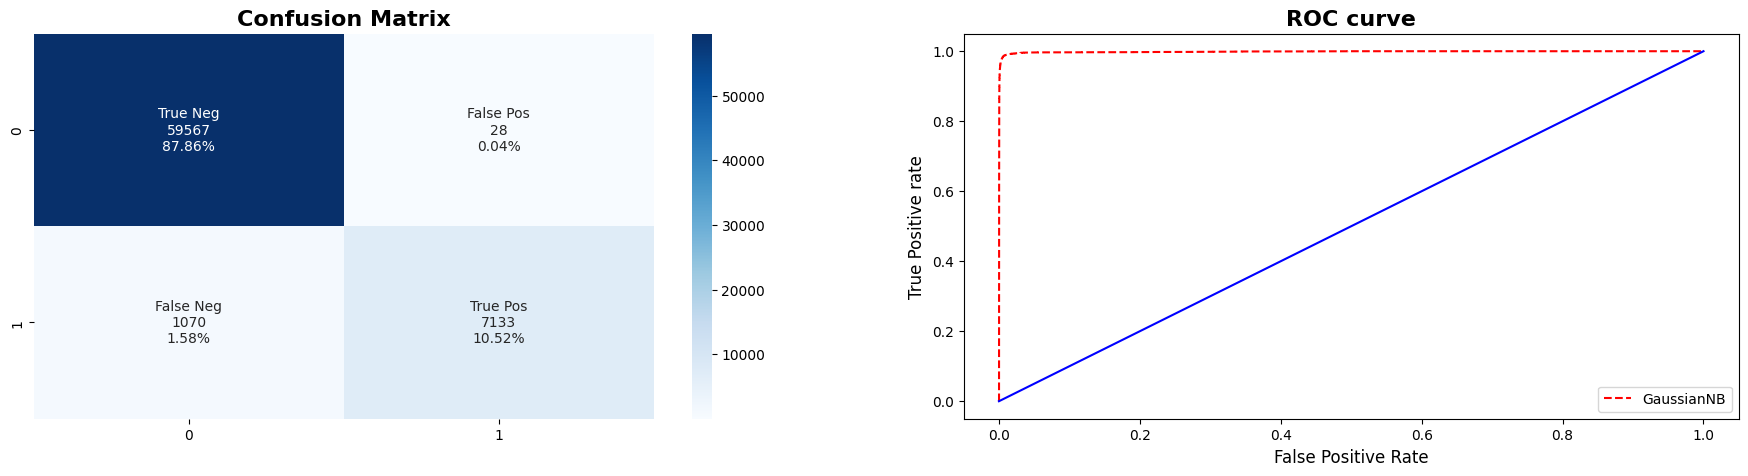

**************************************************
Best Score for GaussianNB : 0.9771604938271606 
---
Best Parameters for GaussianNB : {'var_smoothing': 1e-09}
--------------------------------------------------
Elapsed Time: 00:00:09

Evaluation of GaussianNB after tuning:
--------------------------------------------------
   Accuracy_Score  Precision   Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.983805    0.99609  0.86956  0.928534       0.934545  0.583733



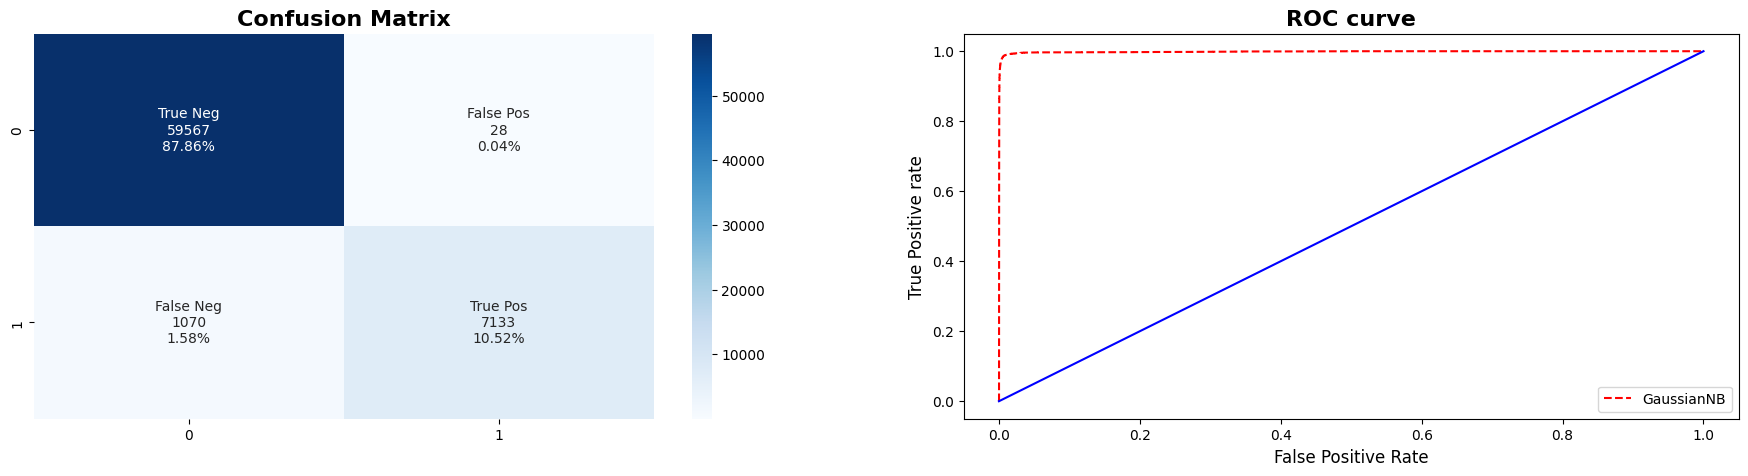

In [ ]:
parameters_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

ml_algorithm_implementation(data_df, GaussianNB(), parameters_NB, Tuning_Method, False)



################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
AdaBoostClassifier
--------------------------------------------------

Evaluation of AdaBoostClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score      Log_Loss
0             1.0        1.0     1.0       1.0            1.0  2.220446e-16



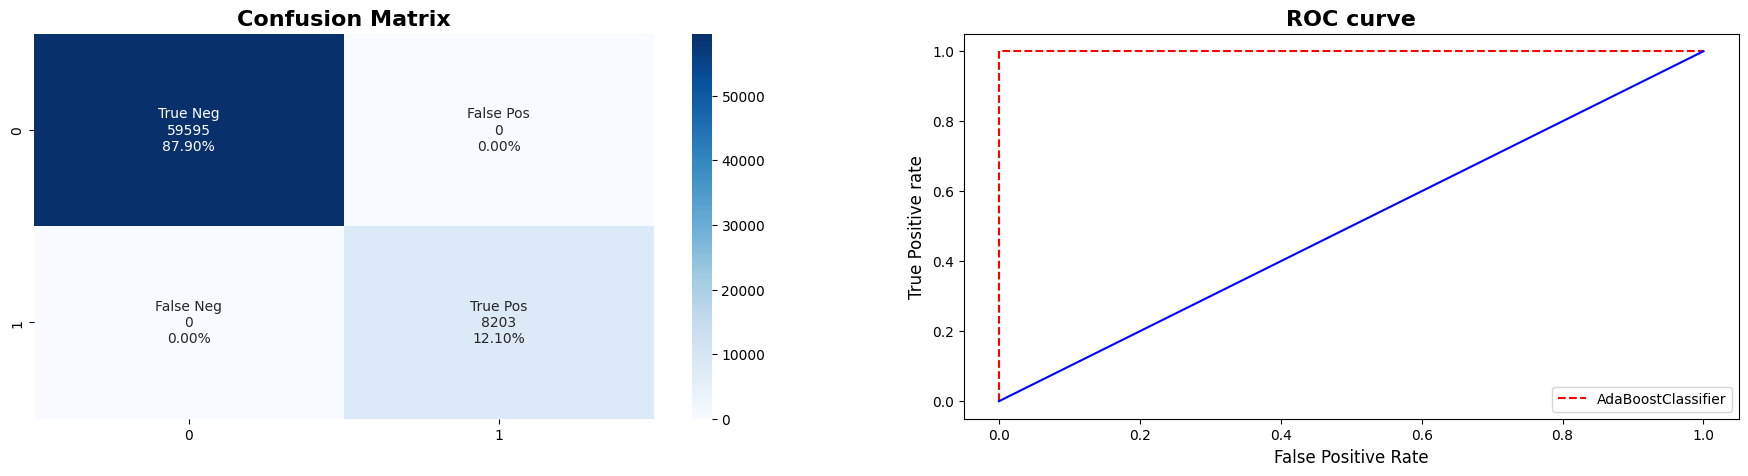

**************************************************
Best Score for AdaBoostClassifier : 1.0 
---
Best Parameters for AdaBoostClassifier : {'random_state': 2, 'n_estimators': 100, 'learning_rate': 0.001}
--------------------------------------------------
Elapsed Time: 00:00:02

Evaluation of AdaBoostClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score      Log_Loss
0             1.0        1.0     1.0       1.0            1.0  2.220446e-16



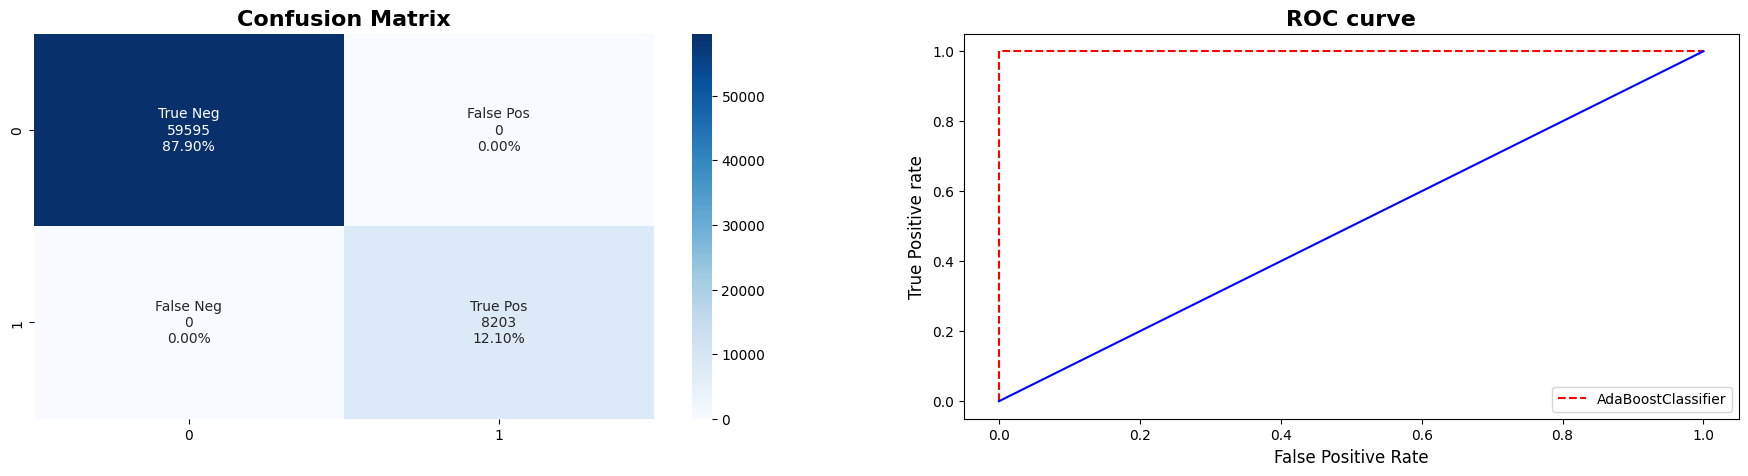

In [ ]:
parameters_ada = {'n_estimators':[10, 100, 200,400],
              'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5],
              'random_state':[2]}

ml_algorithm_implementation(data_df, AdaBoostClassifier(), parameters_ada, Tuning_Method, False)


################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
BaggingClassifier
--------------------------------------------------

Evaluation of BaggingClassifier before tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score      Log_Loss
0             1.0        1.0     1.0       1.0            1.0  2.220446e-16



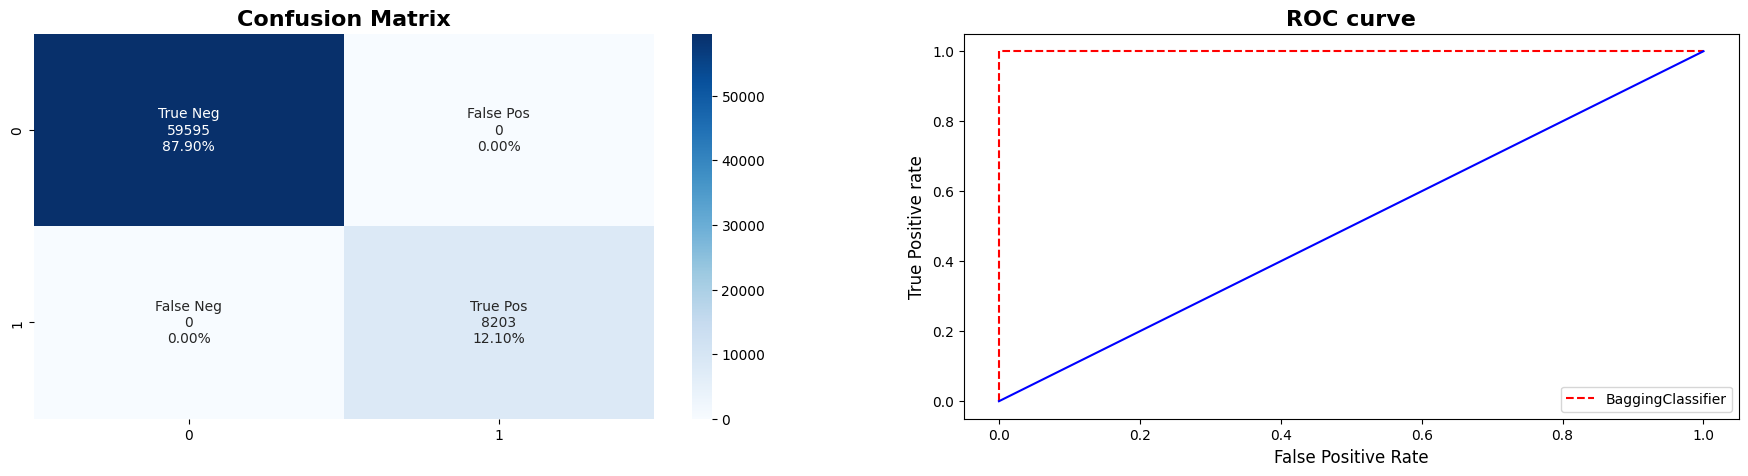

**************************************************
Best Score for BaggingClassifier : 1.0 
---
Best Parameters for BaggingClassifier : {'random_state': 26, 'n_estimators': 400}
--------------------------------------------------
Elapsed Time: 00:00:47

Evaluation of BaggingClassifier after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score      Log_Loss
0             1.0        1.0     1.0       1.0            1.0  2.220446e-16



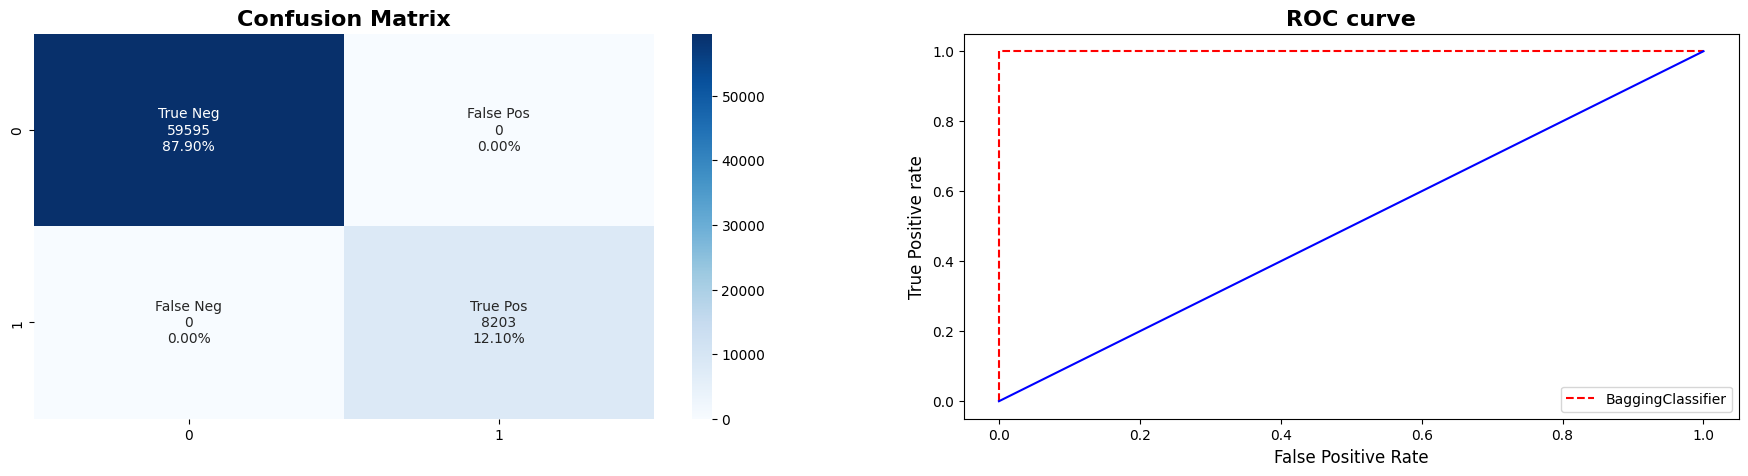

In [ ]:
parameters_bagging = {'n_estimators':[10, 100, 200, 400],
                      'random_state':[26]}

ml_algorithm_implementation(data_df, BaggingClassifier(), parameters_bagging, Tuning_Method, False)


In [ ]:
parameters_lightgbm = {
    'max_depth': np.linspace(1, 32, 32, endpoint=True).astype(int),
    'min_data_in_leaf':[100, 200, 250, 300],
    'n_estimators':[50,100, 120,150,200],
    'learning_rate':[0.001,0.01,.1]
}

################################################################
     <<<< Tuning Model: Halving_Randomized_Search_CV >>>>
****************************************************************
--------------------------------------------------
LogisticRegression
--------------------------------------------------

Evaluation of LogisticRegression before tuning:
--------------------------------------------------
   Accuracy_Score  Precision    Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.999469   0.999511  0.996099  0.997802       0.998016  0.019139



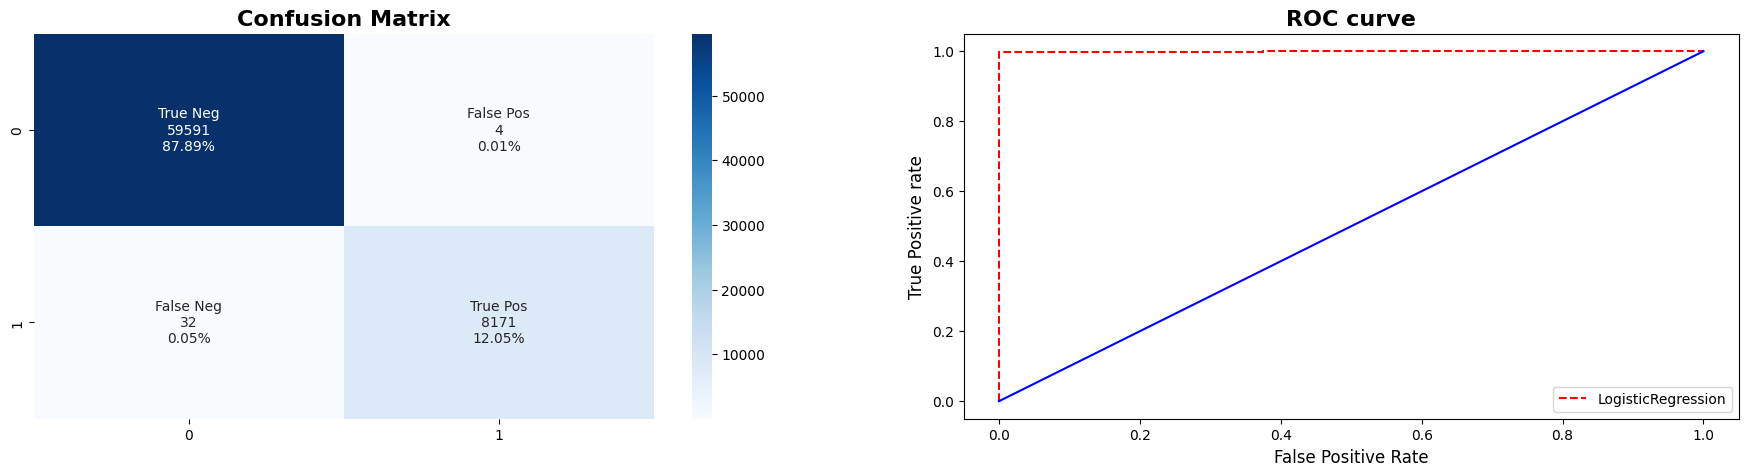

**************************************************
Best Score for LogisticRegression : 0.8907407407407408 
---
Best Parameters for LogisticRegression : {'solver': 'saga', 'random_state': 2, 'penalty': 'l2', 'C': 0.1}
--------------------------------------------------
Elapsed Time: 00:00:14

Evaluation of LogisticRegression after tuning:
--------------------------------------------------
   Accuracy_Score  Precision  Recall  F1_Score  ROC_AUC_Score  Log_Loss
0        0.879008        0.0     0.0       0.0            0.5  4.360985



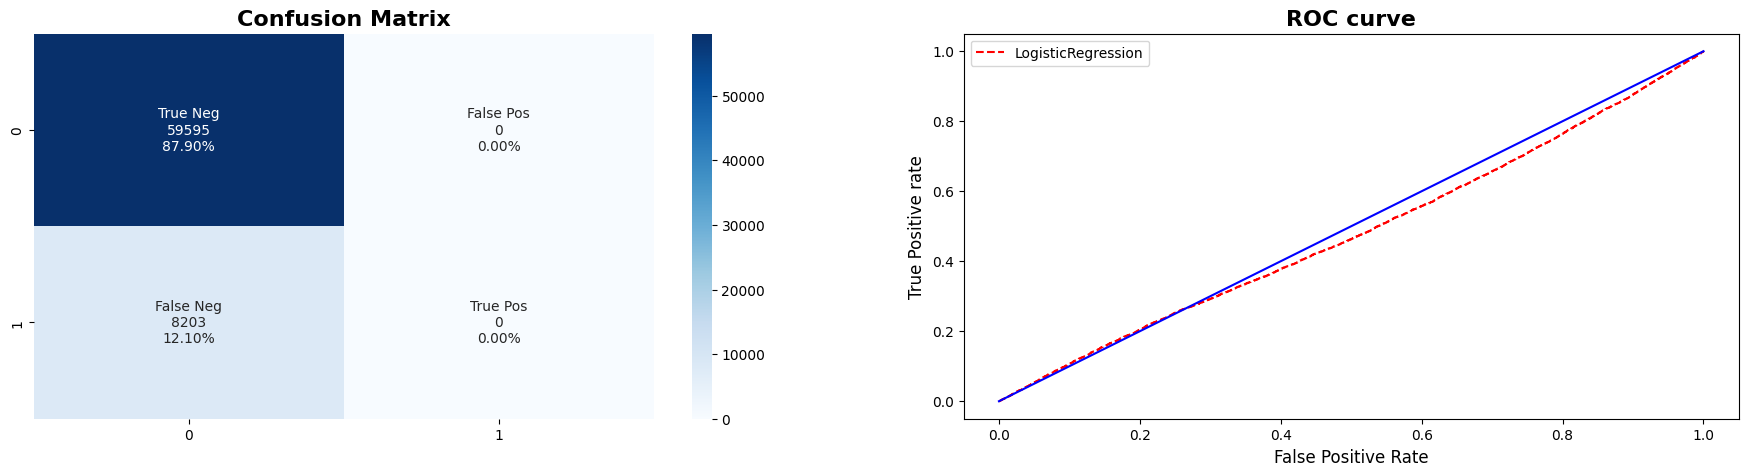

In [ ]:

parameters_logistic = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
                        'penalty' : ['l2'],
                        'C' : [100, 10, 1.0, 0.1, 0.01, 0.001],
                       'random_state':[2]}

ml_algorithm_implementation(data_df, LogisticRegression(), parameters_logistic, Tuning_Method, False)


In [ ]:
def feature_plot(importances, X_train, y_train):

    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.2, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.2, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)

    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()

def show_feature_importance():
    x_train, y_train, model = ml_algorithm_implementation(data_df, BaggingClassifier(n_estimators=200, random_state=23),
                                None, None, True)

    importances = np.mean([
        tree.feature_importances_ for tree in model.estimators_
        ], axis=0)
    feature_plot(importances, x_train, y_train)

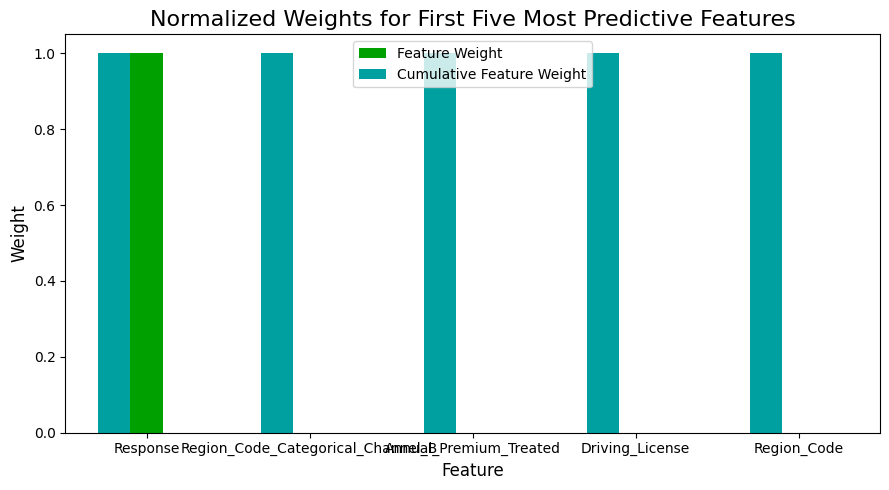

In [ ]:
show_feature_importance()


In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

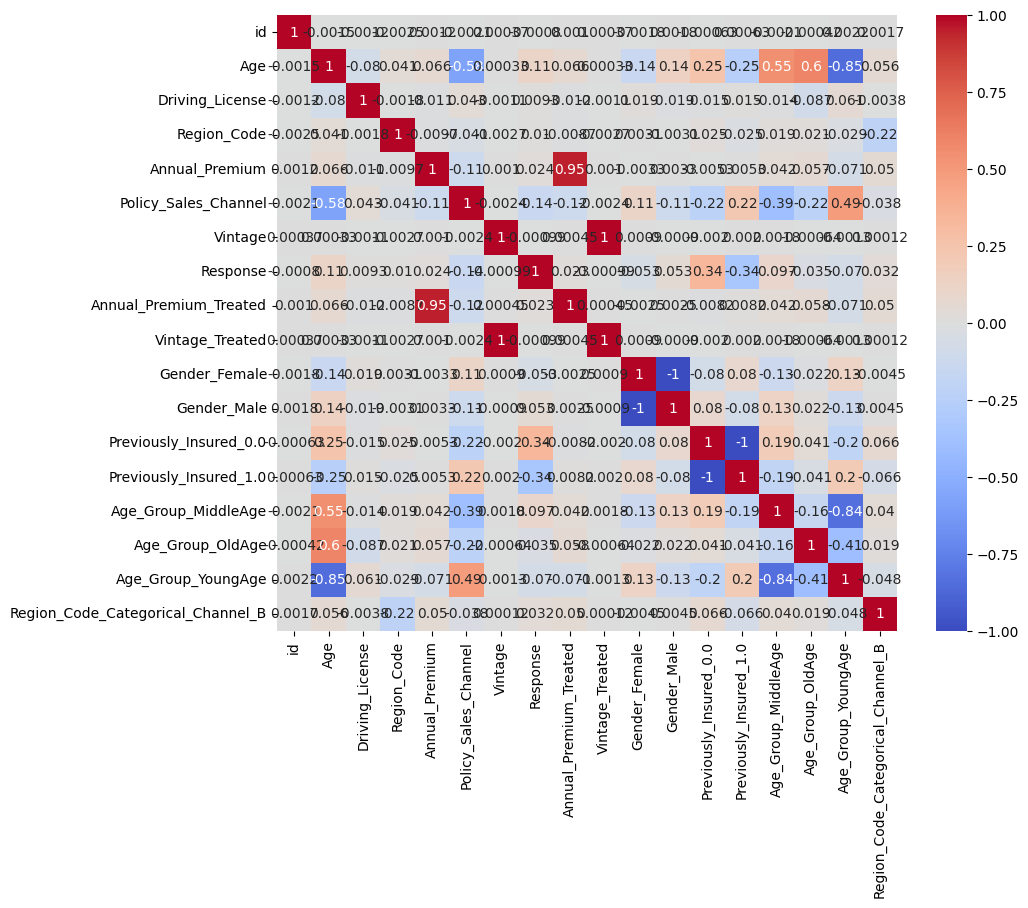

In [ ]:
corr_matrix = data_df.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Define the target variable and the features
y = data_df['Response']
X = data_df.drop(['Response'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8709042235447687


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define the target variable and the features
y = data_df['Response']
X = data_df.drop(['Response'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8645987743091661


In [ ]:
from scipy.stats import zscore
# Calculate the z-score for each feature
z_scores = data_df.apply(zscore)

# Flag data points with a z-score greater than 3 as outliers
outliers = z_scores[(z_scores > 3).any(axis=1)]

# Print the outliers
print(outliers)


              id       Age  Driving_License  Region_Code  Annual_Premium  \
1      -1.732028  2.402122         0.046039    -1.767197        0.174891   
13     -1.731844  2.402122         0.046039     0.122028        0.362913   
14     -1.731829  2.079359         0.046039     0.122028        0.947095   
31     -1.731568  2.595780         0.046039     0.122028        1.564881   
36     -1.731491  2.079359         0.046039    -1.389352        0.603202   
...          ...       ...              ...          ...             ...   
225915  1.730863  1.950253         0.046039     0.122028        0.225356   
225930  1.731093  2.273016         0.046039    -0.860369        1.290290   
225946  1.731338  2.014806         0.046039    -1.767197       -1.621956   
225959  1.731537  2.143911         0.046039     0.122028        0.318030   
225969  1.731691  1.950253       -21.720698    -0.935938        0.728375   

        Policy_Sales_Channel   Vintage  Response  Annual_Premium_Treated  \
1          

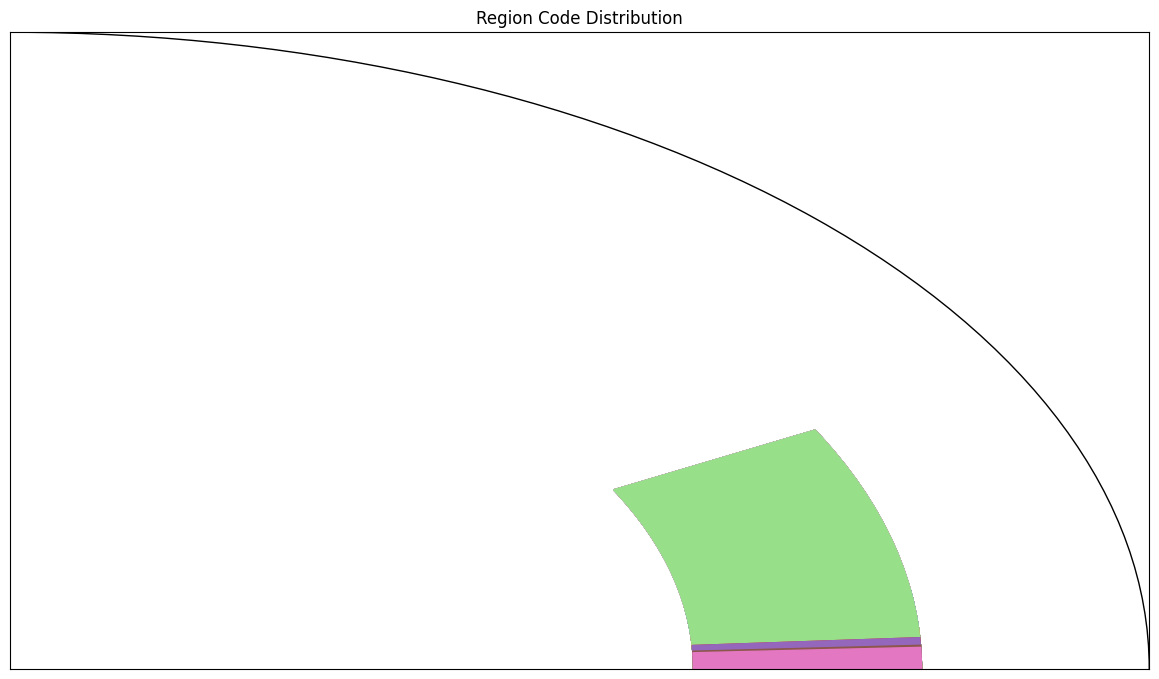

In [ ]:
!pip install matplotlib
from matplotlib.patches import Circle
from matplotlib.patches import Wedge

# Calculate the total number of entries
total_entries = len(data_df)

# Calculate the percentage for each unique "Vehicle Age" value
data_df['Percentage'] = data_df['Region_Code'].apply(lambda x: (len(data_df[data_df['Region_Code'] == x]) / total_entries) * 100)

# Create a donut chart
fig, ax = plt.subplots()

# Create the outer circle (the donut hole)
center, radius = (0, 0), 1
outer_circle = Circle(center, radius, fill=False)
ax.add_patch(outer_circle)

# Get unique "Vehicle Age" values
categories = data_df['Region_Code'].unique()

# Get the corresponding percentages
percentages = data_df['Percentage'].values

# Create the wedges
for i, category in enumerate(categories):
    start_angle = 0
    end_angle = start_angle + percentages[i]
    ax.add_patch(Wedge(center, 0.8, start_angle, end_angle, width=0.2, color=plt.cm.tab20(i % 20)))

# Set the title and labels
ax.set_title("Region Code Distribution")
ax.set_xticks(())
ax.set_yticks(())

# Show the chart
plt.show()